In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('heart_disease_data.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [7]:
df['restecg'].value_counts()

restecg
1    152
0    147
2      4
Name: count, dtype: int64

# EDA

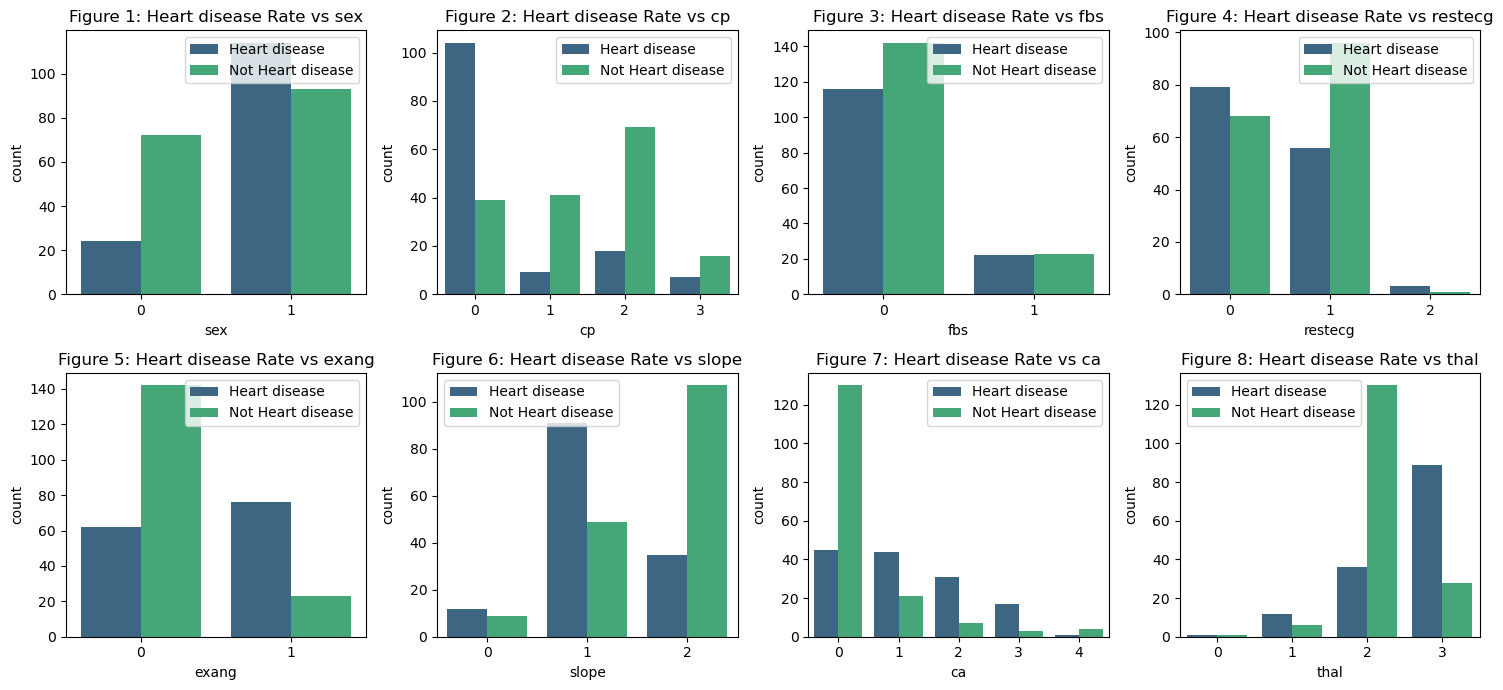

In [8]:
cols = ['sex','cp','fbs', 'restecg','exang','slope','ca','thal']
n_rows = 2
n_cols = 4
fig, ax = plt.subplots(n_rows,n_cols,figsize = (15,7))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data = df, x = cols[i], hue= 'target', palette='viridis', ax = ax_i)
            ax_i.set_title(f"Figure {i+1}: Heart disease Rate vs {cols[i]}")
            ax_i.legend(title='', labels={'Not Heart disease','Heart disease'})
plt.tight_layout()

In [9]:
corr = df.corr()

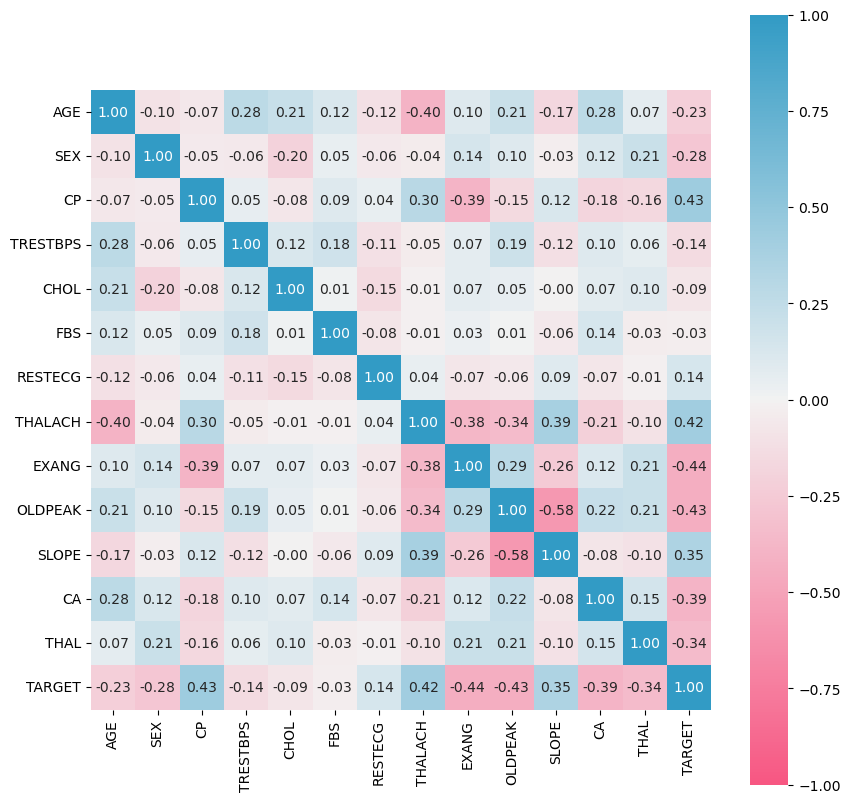

In [10]:
fig, ax = plt.subplots(figsize = (10,10))

cmap = sns.diverging_palette(0,230,90,60, as_cmap=True)
sns.heatmap(data =corr, square=True, cbar=True, annot=True, annot_kws={'size':10}, fmt = '.2f', cmap = cmap, vmax=1, vmin=-1)

ytick = [i.upper() for i in corr.index]
xtick = [i.upper() for i in corr.columns]
ax.set_yticklabels( ytick, rotation = 0, fontsize = 10);
ax.set_xticklabels( xtick, rotation = 90, fontsize = 10);

# Train test Split

In [11]:
X = df.drop(['target'], axis=1)
y =df['target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

In [14]:
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

# Model Evaluation

In [15]:
y_pred_train = log_reg.predict(X_train)
train_data_acc = accuracy_score(y_pred_train,y_train)
print('Accuracy score of train data:', train_data_acc)

Accuracy score of train data: 0.8512396694214877


In [16]:
y_pred_test = log_reg.predict(X_test)
test_data_acc = accuracy_score(y_pred_test,y_test)
print('Accuracy score of test data:', test_data_acc)

Accuracy score of test data: 0.8688524590163934


In [24]:
input_data = [66,0,3,150,226,0,1,114,0,2.6,0,0,2]
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
input_data_df = pd.DataFrame([input_data], columns=feature_names)

prediction = log_reg.predict(input_data_df)
print(prediction)

if prediction[0] == 0:
    print('The person is healthy')
else:
    print('The person has heart disease')

[1]
The person has heart disease
